# M-R relation
* see [results](http://nbviewer.jupyter.org/github/jpdeleon/MRrelation/tree/master/KESPRINT-C10/) generated using Wolfgang's [MRrelation](https://github.com/dawolfgang/MRrelation) based on [Wolfgang, Rogers, & Ford (2015)](https://arxiv.org/abs/1504.07557)

```
Assuming that the M-R relation can be described as a power law with a dispersion that is constant and normally distributed, we find that M/M⊕ = 2.7(R/R⊕)^1.3, a scatter in mass of 1.9M⊕, and a mass constraint to physically plausible densities, is the "best-fit" probabilistic M-R relation for the sample of RV-measured transiting sub-Neptunes (Rpl < 4 R⊕).
```

Other newer references for Mass-Radius relation for small planets:
* An asteroseismic view of the radius valley ([van Eylen+2017](https://arxiv.org/abs/1710.05398))
* A Gap in the Radius Distribution of Small Planets ([Fulton+2017](https://arxiv.org/abs/1703.10375))

In [1]:
from datetime import datetime as dt

dt.now()

datetime.datetime(2017, 11, 9, 17, 35, 45, 298938)

In [2]:
import os
os.environ['CONDA_DEFAULT_ENV']

'astroconda35'

In [3]:
!python --version

Python 3.6.1 :: Continuum Analytics, Inc.


## List of KESPRINT validated systems (K2-Campaign 10)

Data from John

In [4]:
import pandas as pd

#epic with transit+stellar parameters
df = pd.read_csv('../data/c10_per_rad_stm_kp.csv')
df.head()

,epic,pl,p,r,r_err,st_mass,kepmag
0,201092629,b,26.810369,2.10,0.10,0.705105,11.858
1,201102594,b,6.513566,2.73,0.83,0.342000,15.615
2,201110617,b,0.813101,1.49,0.70,0.624323,12.947
3,201128338,b,32.654116,2.30,0.18,0.548301,13.114
4,201132684,b,10.060960,30.05,6.26,0.903000,11.678


## Read an R-script from Python

** run only once**

## Sample result

Let's consider EPIC201092629

In [5]:
df.query('epic == "201092629"')

,epic,pl,p,r,r_err,st_mass,kepmag
0,201092629,b,26.810369,2.1,0.1,0.705105,11.858


![image](../KESPRINT-C10/201092629.png)

## Read posterior samples for M-R

In [6]:
import pandas as pd

#epic with transit+stellar parameters
df = pd.read_csv('../data/c10_per_rad_stm_kp.csv')

In [7]:
import numpy as np
from tqdm import tqdm

inputdir = '/home/jp/github/MRrelation/KESPRINT-C10/'

epics      = df['epic']
radii      = df['r']
pl_list    = df['pl'] #used also as key for merging later

mass_estimates = {}

sigma_minus = []
sigma_plus  = []
mean_value  = [] #mass

new_epics   = []
new_pl_list = []

for epic,pl in tqdm(zip(epics,pl_list)):
    #print(epic)
    fname = inputdir+'massrad_postpred_'+str(epic)+'.txt'
    try:
        df_mr = pd.read_csv(fname, delimiter=' ')#, dtype=float)
        #get mean mass and their 1-sigma uncertainty
        minus, median, plus =np.percentile(df_mr['masses'].values, 
                                           [16,50,84],
                                          axis=0)
        
        assert minus < median < plus
        low = median - minus
        hi  = plus - median
        
        sigma_minus.append(low)
        sigma_plus.append(hi)
        mean_value.append(median)
        
        new_epics.append(epic)
        new_pl_list.append(pl)
        
        mass_estimates[epic] = [low, median, hi]
    except Exception as e:
        print(e)

58it [00:04, 13.18it/s]


In [8]:
mass_estimates.keys()

dict_keys([201092629, 201102594, 201110617, 201128338, 201132684, 201164625, 201166680, 201211526, 201234090, 201274010, 201352100, 201386739, 201390048, 201390927, 201392505, 201437844, 201595106, 201598502, 201615463, 228707509, 228721452, 228725791, 228725972, 228729473, 228732031, 228734900, 228735255, 228736155, 228739306, 228748383, 228748826, 228753871, 228758778, 228758948, 228763938, 228798746, 228801451, 228804845, 228809391, 228809550, 228834632, 228846243, 228888935, 228894622, 228934525, 228962330, 228968232, 228974324, 228974907, 229017395, 229131722, 229133720])

Convert into dataframe:

In [9]:
df_mass = pd.DataFrame({'epic': new_epics, 
              'pl': new_pl_list,
              'm': mean_value,
              'm_err-': sigma_minus,
              'm_err+': sigma_plus})

In [10]:
df_mass.head()

,epic,m,m_err+,m_err-,pl
0,201092629,6.922634,2.338021,2.310607,b
1,201102594,9.646343,4.598737,4.328718,b
2,201110617,4.174429,4.001992,3.656924,b
3,201128338,7.787949,2.406004,2.442290,b
4,201132684,5.834123,2.825386,2.831575,b


In [11]:
len(df_mass)

58

Merge df

In [12]:
df_final = pd.merge(df_mass, df, on=['epic','pl'])
df_final

,epic,m,m_err+,m_err-,pl,p,r,r_err,st_mass,kepmag
0,201092629,6.922634,2.338021,2.310607,b,26.810369,2.10,0.10,0.705105,11.858
1,201102594,9.646343,4.598737,4.328718,b,6.513566,2.73,0.83,0.342000,15.615
2,201110617,4.174429,4.001992,3.656924,b,0.813101,1.49,0.70,0.624323,12.947
3,201128338,7.787949,2.406004,2.442290,b,32.654116,2.30,0.18,0.548301,13.114
4,201132684,5.834123,2.825386,2.831575,b,10.060960,30.05,6.26,0.903000,11.678
5,201132684,5.834123,2.825386,2.831575,c,5.908910,1.83,0.39,0.903000,11.678
6,201164625,7.090807,3.924002,4.006259,b,2.711440,2.14,0.72,1.290089,11.919
7,201166680,7.162446,2.576798,2.541489,b,24.941841,2.22,0.25,1.293000,10.897
8,201166680,7.162446,2.576798,2.541489,c,11.540582,2.15,0.27,1.293000,10.897
9,201211526,4.743663,2.406586,2.285985,b,21.072025,1.56,0.20,0.870525,11.696


In [13]:
import matplotlib.pyplot as pl
%matplotlib inline

pl.style.use('seaborn-white')
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
pl.rcParams['ytick.labelsize'] = 'large'
pl.rcParams['xtick.labelsize'] = 'large'
fontsize=18

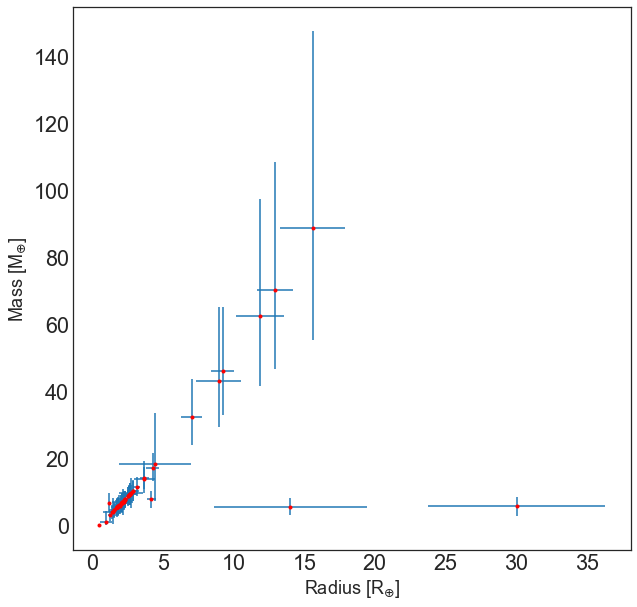

In [14]:
fig = pl.figure(figsize=(10,10))

m    = df_final['m'].values
r    = df_final['r'].values
minus= df_final['m_err-'].values
plus = df_final['m_err+'].values
rerr = df_final['r_err'].values

m_err = [minus,plus]

pl.plot(r,m,'r.')
pl.errorbar(r,m,yerr=m_err,xerr=rerr,linestyle='')
pl.xlabel('Radius [R$_{\oplus}$]')
pl.ylabel('Mass [M$_{\oplus}$]')

Check outlier:

In [15]:
#df_final.query('r > 14')
df_final.query('m > 70')

,epic,m,m_err+,m_err-,pl,p,r,r_err,st_mass,kepmag
22,228707509,70.270130,38.202605,23.599830,b,15.350901,12.93,1.29,0.815000,14.806
27,228729473,88.840539,58.528572,33.500368,b,16.773321,15.61,2.31,1.042014,11.524


In [16]:
name   = 228725791 #228729473
text   = 'epic == {}'.format(name)
rad    = df_final.query(text)['r'] 
raderr = df_final.query(text)['r_err']

mass_estimates[name]

[2.4517300570599838, 5.6742359499768753, 2.4955492518840199]

In [17]:
fname = inputdir+'massrad_postpred_'+str(name)+'.txt'
df_mr = pd.read_csv(fname, delimiter=' ')
np.percentile(df_mr['masses'].values,[16,50,84])

array([ 3.22250589,  5.67423595,  8.1697852 ])

Check in terminal if output of MRrelation is really wrong:
```
$ Rscript scripts/run_MR.R $name $rad $raderr
$ cd ~/github/MRrelation
```

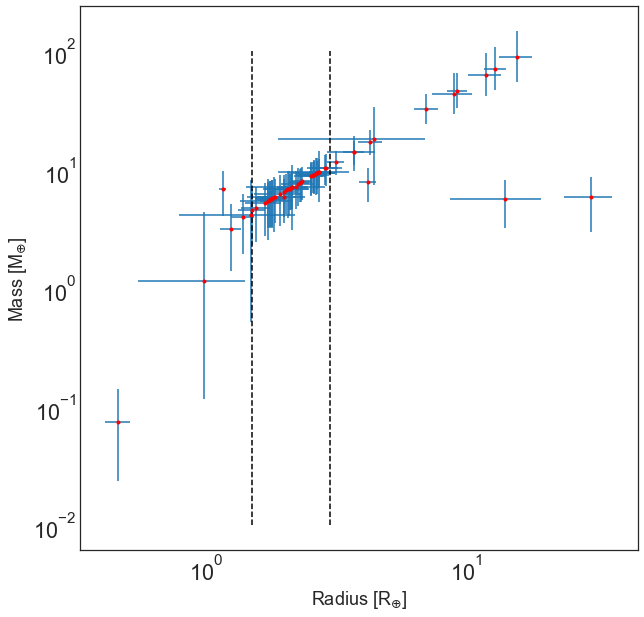

In [18]:
fig = pl.figure(figsize=(10,10))

m    = df_final['m'].values
r    = df_final['r'].values
minus= df_final['m_err-'].values
plus = df_final['m_err+'].values
rerr = df_final['r_err'].values

m_err = [minus,plus]

pl.plot(r,m,'r.')
pl.errorbar(r,m,yerr=m_err,xerr=rerr,linestyle='')
pl.xscale('log')
pl.yscale('log')
pl.xlabel('Radius [R$_{\oplus}$]')
pl.ylabel('Mass [M$_{\oplus}$]')

#ylims = *pl.gca().get_ylim()
ylims = [1e-2, 1e2]

#super Earth
pl.vlines(1.5, *ylims, linestyle='--')
#sub-Neptune
pl.vlines(3, *ylims, linestyle='--')

## Straddling the Fulton gap?

* [Fulton+2017](https://arxiv.org/pdf/1703.10375.pdf): 

```
We detect a factor of ≥2 deficit in the occurrence rate distribution at 1.5–2.0 R⊕. 
This gap splits the population of close-in (P < 100 d) small planets into two size regimes: 

RP < 1.5 R⊕ and RP = 2.0–3.0 R⊕, with few planets in between. 

Planets in these two regimes have nearly the same intrinsic frequency based on occurrence
measurements that account for planet detection efficiencies. 
The paucity of planets between 1.5 and 2.0 R⊕ supports the emerging picture that close-in 
planets smaller than Neptune are composed of rocky cores measuring 1.5 R⊕ or smaller with 
varying amounts of low-density gas that determine their total sizes.
```

* [van Eylen](https://arxiv.org/pdf/1710.05398.pdf):

```
We detect a clear bimodal distribution, with 
super-Earths (≈ 1.5 R⊕)and sub-Neptunes (≈ 2.5 R⊕) 
separated by a deficiency around 2 R⊕. 

We furthermore characterize the slope of the valley as a power law 
R ∝ P
γ with γ = −0.09 [+0.02 −0.04]. 

A negative slope is consistent with models of photo-evaporation, 
but not with the late formation of rocky planets in a gas-poor environment, 
which would lead to a slope of opposite sign.
The exact location of the gap further points to planet cores consisting
of a significant fraction of rocky material.
```

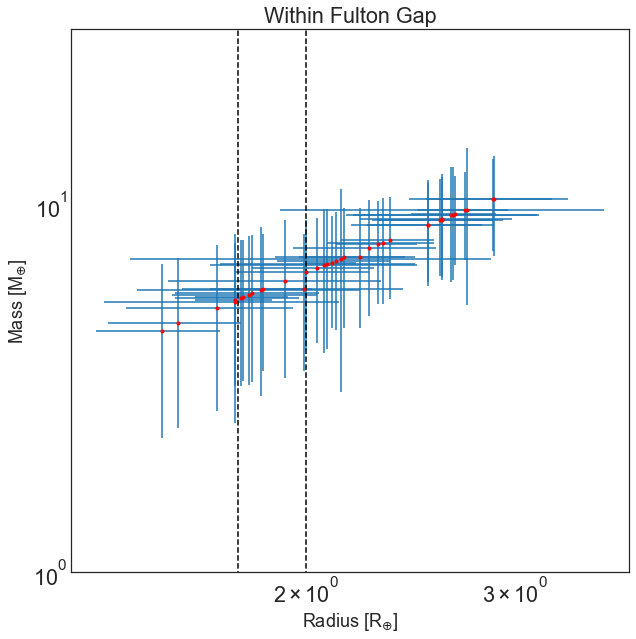

In [19]:
within_gap = df_final.query('1.5 <= r <= 3')

fig = pl.figure(figsize=(10,10))

loglog = True

m    = within_gap['m'].values
r    = within_gap['r'].values
minus= within_gap['m_err-'].values
plus = within_gap['m_err+'].values
rerr = within_gap['r_err'].values

m_err = [minus,plus]

pl.plot(r,m,'r.')
pl.errorbar(r,m,yerr=m_err,xerr=rerr,linestyle='')
if loglog:
    pl.xscale('log')
    pl.yscale('log')
    pl.ylim(1,30)
pl.xlabel('Radius [R$_{\oplus}$]')
pl.ylabel('Mass [M$_{\oplus}$]')
pl.title('Within Fulton Gap')
#super Earth
pl.vlines(1.75, *ylims, linestyle='--')
#sub-Neptune
pl.vlines(2, *ylims, linestyle='--')

## Radius distribution of planets near the gap

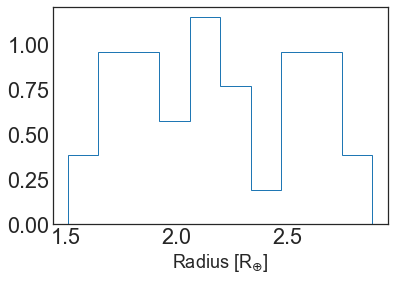

In [20]:
r    = within_gap['r'].values
pl.hist(r, normed=True, histtype='step');
pl.xlabel('Radius [R$_{\oplus}$]')

## Mass distribution of planets near the gap

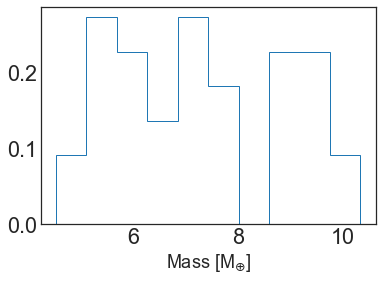

In [21]:
m    = within_gap['m'].values
pl.hist(m, normed=True, histtype='step');
pl.xlabel('Mass [M$_{\oplus}$]')

## Semi-amplitude

* Equation taken from [NExSci page](https://exoplanetarchive.ipac.caltech.edu/docs/poet_calculations.html)

In [22]:
def K(period, Mp, Ms, inc=np.pi/2, ecc=0):
    '''
    period: orbital period in day
    Mp : mass of planet in Jupiter mass
    Ms : mass of star in solar mass
    
    RV semi-amplitude in m/s
    '''
    first = 203*(period)**(-1/3)
    num   = Mp*np.sin(inc)
    den   = (Ms + 9.548e-4 * Mp)**(2/3)
    third = 1/(np.sqrt(1-ecc**2))
    
    return first * num/den * third

In [23]:
import astropy.units as u

Mj = df_final['m'].values*u.Mearth.to(u.Mjup)
P  = df_final['p'].values
Ms = df_final['st_mass'].values

df_final['semi_amp'] = K(P,Mj, Ms) 

In [24]:
df_final

,epic,m,m_err+,m_err-,pl,p,r,r_err,st_mass,kepmag,semi_amp
0,201092629,6.922634,2.338021,2.310607,b,26.810369,2.10,0.10,0.705105,11.858,1.864787
1,201102594,9.646343,4.598737,4.328718,b,6.513566,2.73,0.83,0.342000,15.615,6.745557
2,201110617,4.174429,4.001992,3.656924,b,0.813101,1.49,0.70,0.624323,12.947,3.910571
3,201128338,7.787949,2.406004,2.442290,b,32.654116,2.30,0.18,0.548301,13.114,2.323035
4,201132684,5.834123,2.825386,2.831575,b,10.060960,30.05,6.26,0.903000,11.678,1.847573
5,201132684,5.834123,2.825386,2.831575,c,5.908910,1.83,0.39,0.903000,11.678,2.206204
6,201164625,7.090807,3.924002,4.006259,b,2.711440,2.14,0.72,1.290089,11.919,2.740613
7,201166680,7.162446,2.576798,2.541489,b,24.941841,2.22,0.25,1.293000,10.897,1.319222
8,201166680,7.162446,2.576798,2.541489,c,11.540582,2.15,0.27,1.293000,10.897,1.705631
9,201211526,4.743663,2.406586,2.285985,b,21.072025,1.56,0.20,0.870525,11.696,1.203158


# Full sample 

* Mp > 13 is removed

In [25]:
full = df_final[df_final['m'] <= 13]

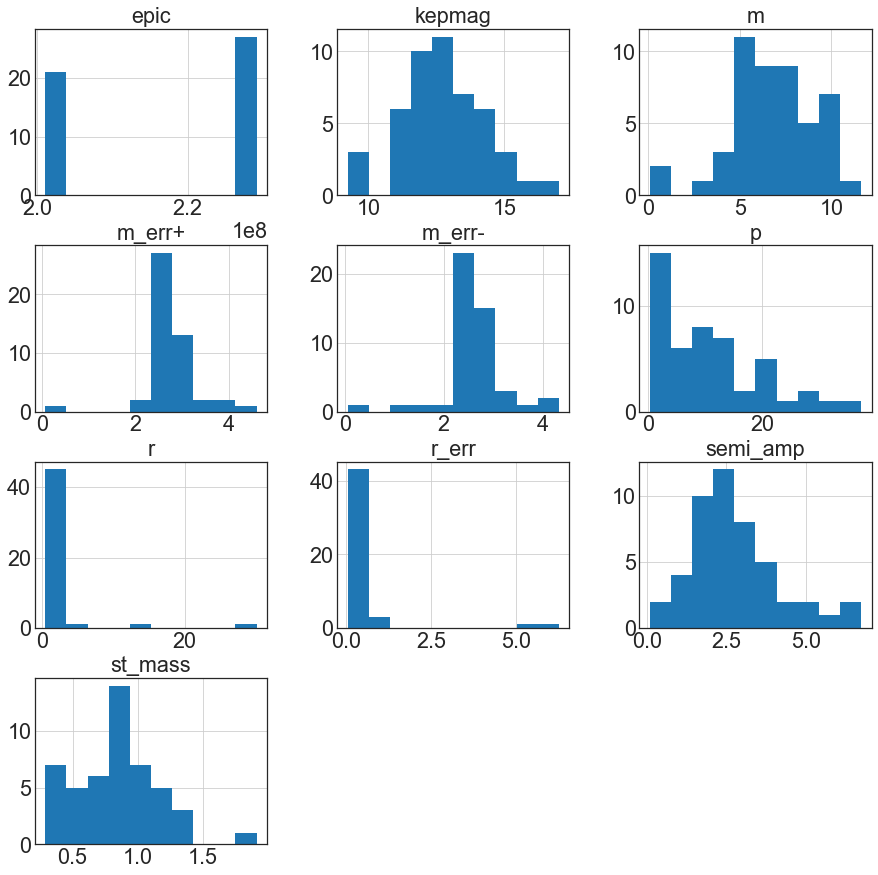

In [26]:
full.hist(figsize=(15,15));

## Anything interesting?

According to [wiki](https://en.wikipedia.org/wiki/Red_dwarf), 
* M0V ~ 60% M$_{\odot}$
* M3V ~ 36% M$_{\odot}$
* M9V ~ 7.5% M$_{\odot}$

arbitrary definition
* K: 0.6 R$_{\odot}$ < Rs < 0.8 R$_{\odot}$

### 1. around Red dwarfs (R_s < 0.8 R$_{\odot}$)

In [27]:
around_RedDwarf = df_final.query('st_mass <= 0.8')
around_RedDwarf

,epic,m,m_err+,m_err-,pl,p,r,r_err,st_mass,kepmag,semi_amp
0,201092629,6.922634,2.338021,2.310607,b,26.810369,2.10,0.10,0.705105,11.858,1.864787
1,201102594,9.646343,4.598737,4.328718,b,6.513566,2.73,0.83,0.342000,15.615,6.745557
2,201110617,4.174429,4.001992,3.656924,b,0.813101,1.49,0.70,0.624323,12.947,3.910571
3,201128338,7.787949,2.406004,2.442290,b,32.654116,2.30,0.18,0.548301,13.114,2.323035
10,201234090,1.143872,3.261349,1.028531,b,37.274164,0.98,0.43,0.339000,17.003,0.449858
14,201390048,4.534384,2.362483,2.213072,b,9.458907,1.51,0.18,0.746000,11.961,1.664857
15,201390927,5.604955,2.369581,2.297787,b,2.637926,1.77,0.16,0.585000,14.210,3.704040
16,201392505,11.624298,2.751219,2.675946,b,27.459624,3.15,0.24,0.791128,13.384,2.876921
20,201598502,6.526532,2.535748,2.507843,b,7.514982,2.00,0.26,0.448000,14.331,3.634783
24,228725791,5.674236,2.495549,2.451730,b,2.250263,14.02,5.39,0.436000,14.344,4.809840


In [28]:
around_MDwarf = df_final.query('st_mass < 0.6')

(0, 10)

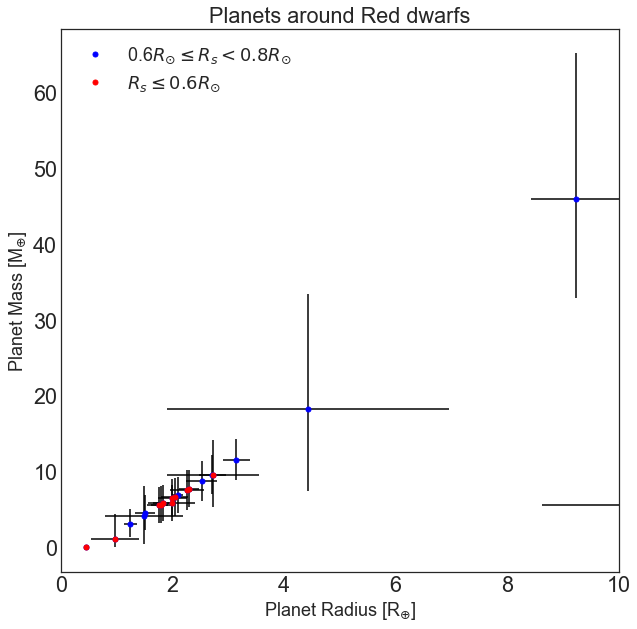

In [29]:
fig = pl.figure(figsize=(10,10))

loglog = False

m    = around_RedDwarf['m'].values
r    = around_RedDwarf['r'].values
minus= around_RedDwarf['m_err-'].values
plus = around_RedDwarf['m_err+'].values
rerr = around_RedDwarf['r_err'].values
#names= around_RedDwarf['epic'].values
m_err = [minus,plus]

pl.plot(r,m,'b.',ms=10,label='0.6$R_{\odot}\leq R_s<0.8R_{\odot}$')

#show those around M dwarf in red
mm = around_MDwarf['m'].values
rr = around_MDwarf['r'].values
pl.plot(rr,mm,'r.',ms=10,label='$R_s \leq 0.6 R_{\odot}$')

pl.errorbar(r,m,yerr=m_err,xerr=rerr,linestyle='',color='k')
if loglog:
    pl.xscale('log')
    pl.yscale('log')
pl.xlabel('Planet Radius [R$_{\oplus}$]')
pl.ylabel('Planet Mass [M$_{\oplus}$]')
pl.title('Planets around Red dwarfs')
pl.legend(loc='upper left')


#Outlier R>10R_E
pl.xlim(0,10)
#add names
# offset=1
# for x,y,n in zip(r,m,names):
#     pl.text(x,y+offset,n,color='k')

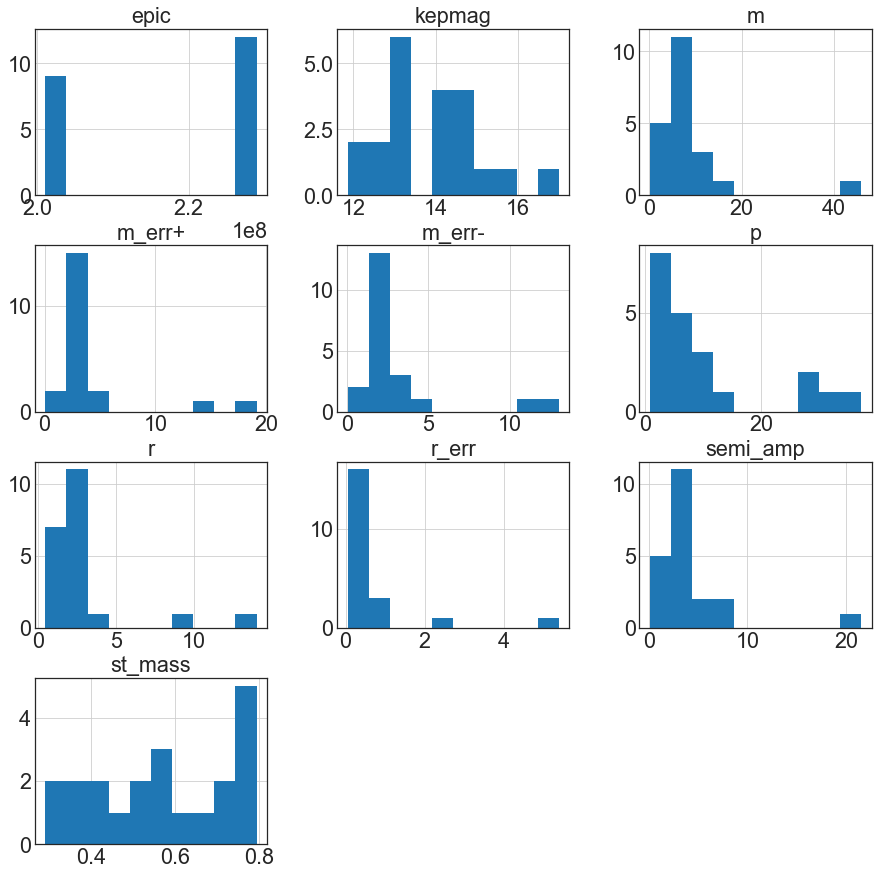

In [30]:
around_RedDwarf.hist(figsize=(15,15));

### 2. sub-Neptunes ($R_p <$ 3.8 R$_{\oplus}$)

* how about Fulton Gap (1.5 R$_{\oplus} \leq R_p \leq$ 2 R$_{\oplus}$)?

In [31]:
sub_neptune = df_final.query('r < 3.8')
sub_neptune

,epic,m,m_err+,m_err-,pl,p,r,r_err,st_mass,kepmag,semi_amp
0,201092629,6.922634,2.338021,2.310607,b,26.810369,2.10,0.10,0.705105,11.858,1.864787
1,201102594,9.646343,4.598737,4.328718,b,6.513566,2.73,0.83,0.342000,15.615,6.745557
2,201110617,4.174429,4.001992,3.656924,b,0.813101,1.49,0.70,0.624323,12.947,3.910571
3,201128338,7.787949,2.406004,2.442290,b,32.654116,2.30,0.18,0.548301,13.114,2.323035
5,201132684,5.834123,2.825386,2.831575,c,5.908910,1.83,0.39,0.903000,11.678,2.206204
6,201164625,7.090807,3.924002,4.006259,b,2.711440,2.14,0.72,1.290089,11.919,2.740613
7,201166680,7.162446,2.576798,2.541489,b,24.941841,2.22,0.25,1.293000,10.897,1.319222
8,201166680,7.162446,2.576798,2.541489,c,11.540582,2.15,0.27,1.293000,10.897,1.705631
9,201211526,4.743663,2.406586,2.285985,b,21.072025,1.56,0.20,0.870525,11.696,1.203158
10,201234090,1.143872,3.261349,1.028531,b,37.274164,0.98,0.43,0.339000,17.003,0.449858


COPY plot above; just change xlim

(0, 3.8)

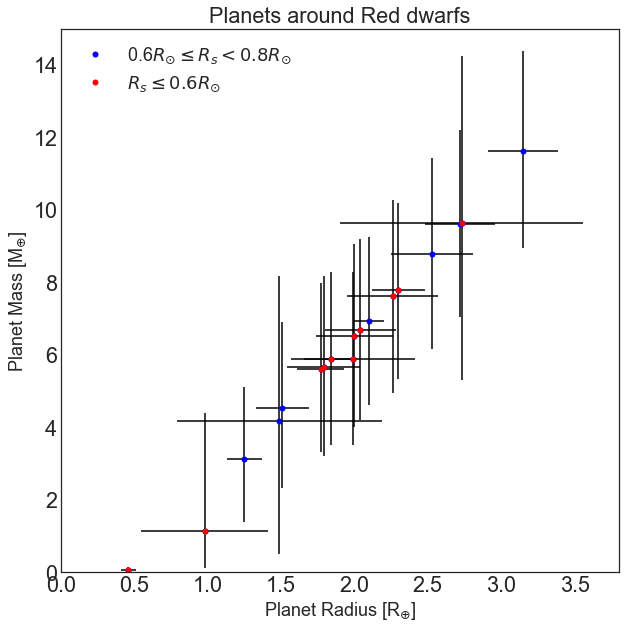

In [32]:
fig = pl.figure(figsize=(10,10))

loglog = False

pl.plot(r,m,'b.',ms=10,label='0.6$R_{\odot}\leq R_s<0.8R_{\odot}$')

#show those around M dwarf in red
mm = around_MDwarf['m'].values
rr = around_MDwarf['r'].values
pl.plot(rr,mm,'r.',ms=10,label='$R_s \leq 0.6 R_{\odot}$')

pl.errorbar(r,m,yerr=m_err,xerr=rerr,linestyle='',color='k')
if loglog:
    pl.xscale('log')
    pl.yscale('log')
pl.xlabel('Planet Radius [R$_{\oplus}$]')
pl.ylabel('Planet Mass [M$_{\oplus}$]')
pl.title('Planets around Red dwarfs')
pl.legend(loc='upper left')

pl.ylim(0,15)
pl.xlim(0,3.8)
#add names
# offset=1
# for x,y,n in zip(r,m,names):
#     pl.text(x,y+offset,n,color='k')

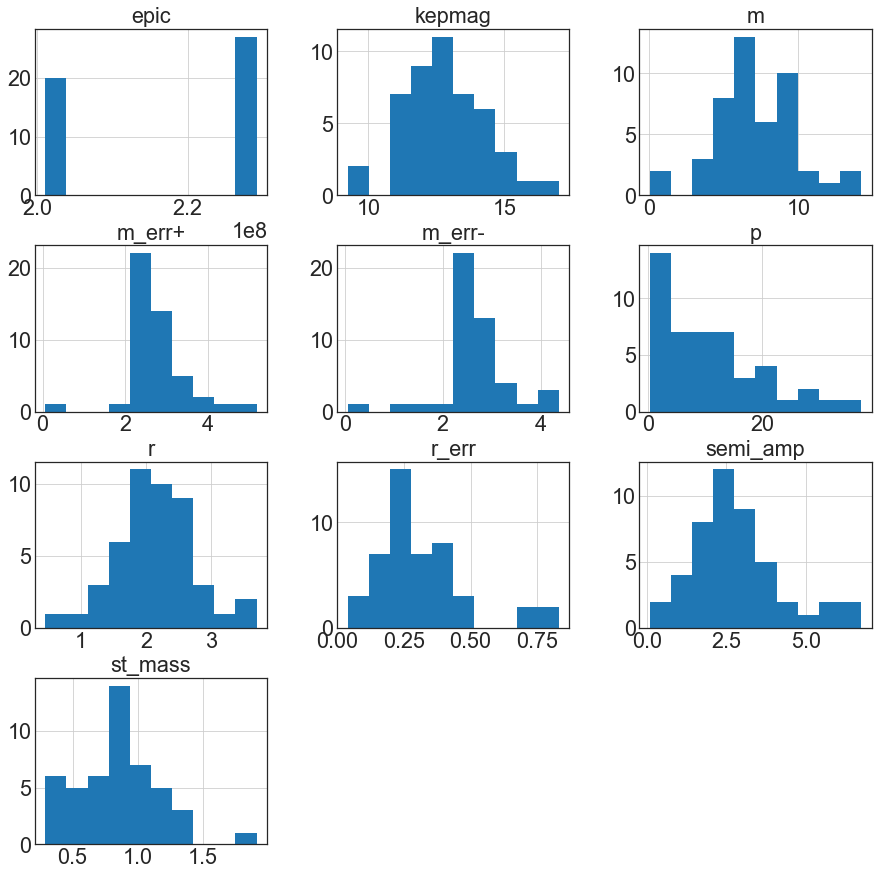

In [33]:
sub_neptune.hist(figsize=(15,15));

### 3. Around bright stars (Kp<13)

In [34]:
bright = df_final.query('kepmag <= 13')
bright

,epic,m,m_err+,m_err-,pl,p,r,r_err,st_mass,kepmag,semi_amp
0,201092629,6.922634,2.338021,2.310607,b,26.810369,2.10,0.10,0.705105,11.858,1.864787
2,201110617,4.174429,4.001992,3.656924,b,0.813101,1.49,0.70,0.624323,12.947,3.910571
4,201132684,5.834123,2.825386,2.831575,b,10.060960,30.05,6.26,0.903000,11.678,1.847573
5,201132684,5.834123,2.825386,2.831575,c,5.908910,1.83,0.39,0.903000,11.678,2.206204
6,201164625,7.090807,3.924002,4.006259,b,2.711440,2.14,0.72,1.290089,11.919,2.740613
7,201166680,7.162446,2.576798,2.541489,b,24.941841,2.22,0.25,1.293000,10.897,1.319222
8,201166680,7.162446,2.576798,2.541489,c,11.540582,2.15,0.27,1.293000,10.897,1.705631
9,201211526,4.743663,2.406586,2.285985,b,21.072025,1.56,0.20,0.870525,11.696,1.203158
12,201352100,10.321620,2.943986,2.877206,b,13.382208,2.87,0.35,0.866316,12.798,3.055488
14,201390048,4.534384,2.362483,2.213072,b,9.458907,1.51,0.18,0.746000,11.961,1.664857


(0, 5)

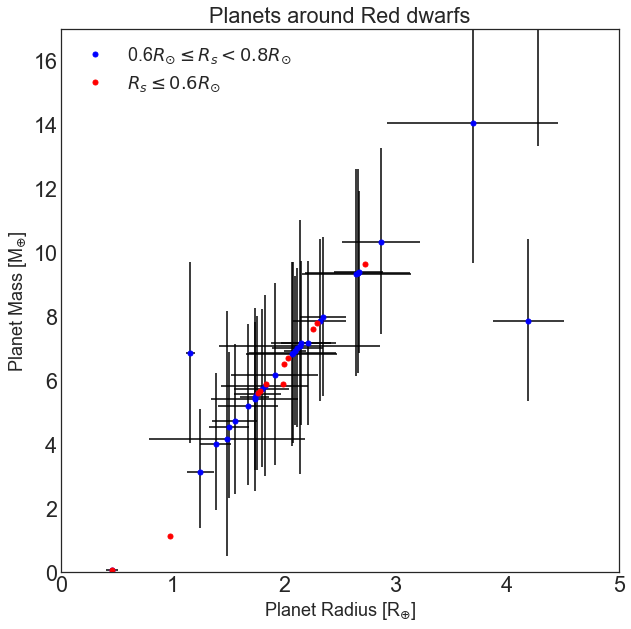

In [35]:
fig = pl.figure(figsize=(10,10))

loglog = False

m    = bright['m'].values
r    = bright['r'].values
minus= bright['m_err-'].values
plus = bright['m_err+'].values
rerr = bright['r_err'].values
#names= around_RedDwarf['epic'].values
m_err = [minus,plus]

pl.plot(r,m,'b.',ms=10,label='0.6$R_{\odot}\leq R_s<0.8R_{\odot}$')

#show those around M dwarf in red
mm = around_MDwarf['m'].values
rr = around_MDwarf['r'].values
pl.plot(rr,mm,'r.',ms=10,label='$R_s \leq 0.6 R_{\odot}$')

pl.errorbar(r,m,yerr=m_err,xerr=rerr,linestyle='',color='k')
if loglog:
    pl.xscale('log')
    pl.yscale('log')
pl.xlabel('Planet Radius [R$_{\oplus}$]')
pl.ylabel('Planet Mass [M$_{\oplus}$]')
pl.title('Planets around Red dwarfs')
pl.legend(loc='upper left')


pl.ylim(0,17)
pl.xlim(0,5)

#add names
# offset=1
# for x,y,n in zip(r,m,names):
#     pl.text(x,y+offset,n,color='k')

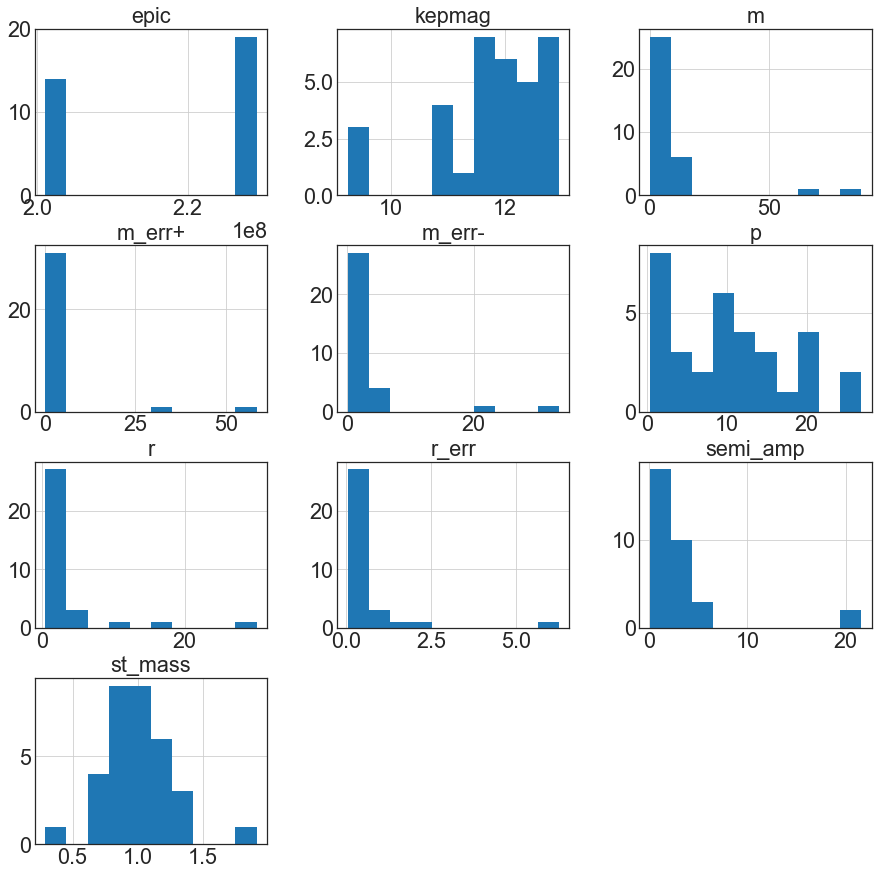

In [36]:
bright.hist(figsize=(15,15));

### 4. sub-Neptunes around bright red dwarfs

In [37]:
sub_neptune_around_bright_RedDwarf = df_final.query('r < 3.8 and kepmag<13 and st_mass <= 0.8')
sub_neptune_around_bright_RedDwarf

,epic,m,m_err+,m_err-,pl,p,r,r_err,st_mass,kepmag,semi_amp
0,201092629,6.922634,2.338021,2.310607,b,26.810369,2.10,0.10,0.705105,11.858,1.864787
2,201110617,4.174429,4.001992,3.656924,b,0.813101,1.49,0.70,0.624323,12.947,3.910571
14,201390048,4.534384,2.362483,2.213072,b,9.458907,1.51,0.18,0.746000,11.961,1.664857
39,228798746,3.137300,1.963474,1.738480,b,2.698404,1.25,0.12,0.709000,12.660,1.810182
53,228974324,0.074458,0.066437,0.050980,b,1.605924,0.46,0.05,0.291000,12.873,0.092479


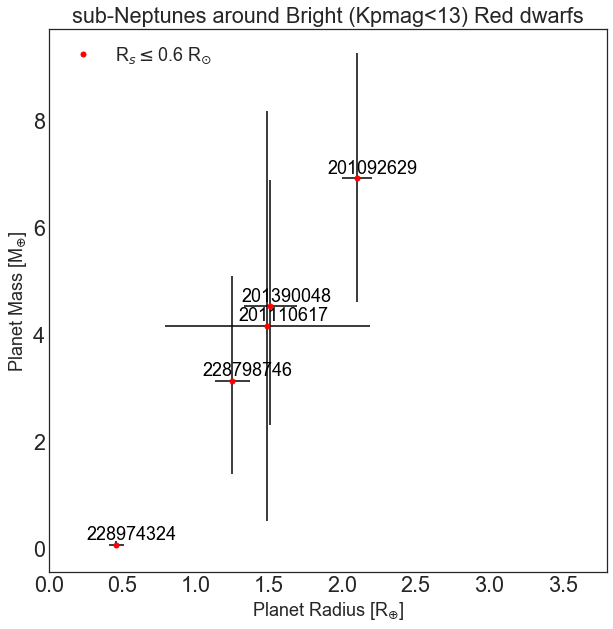

In [38]:
fig = pl.figure(figsize=(10,10))

loglog = False

m    = sub_neptune_around_bright_RedDwarf['m'].values
r    = sub_neptune_around_bright_RedDwarf['r'].values
minus= sub_neptune_around_bright_RedDwarf['m_err-'].values
plus = sub_neptune_around_bright_RedDwarf['m_err+'].values
rerr = sub_neptune_around_bright_RedDwarf['r_err'].values
names= sub_neptune_around_bright_RedDwarf['epic'].values
m_err = [minus,plus]

#pl.plot(r,m,'b.',ms=10,label='0.6R$_{\odot}\leq R_p<0.8R_{\odot}$')

#show those around M dwarf in red
mm = sub_neptune_around_bright_RedDwarf['m'].values
rr = sub_neptune_around_bright_RedDwarf['r'].values
pl.plot(rr,mm,'r.',ms=10,label='R$_s \leq$0.6 R$_{\odot}$')

pl.errorbar(r,m,yerr=m_err,xerr=rerr,linestyle='',color='k')
if loglog:
    pl.xscale('log')
    pl.yscale('log')
pl.xlabel('Planet Radius [R$_{\oplus}$]')
pl.ylabel('Planet Mass [M$_{\oplus}$]')
pl.title('sub-Neptunes around Bright (Kpmag<13) Red dwarfs')
pl.legend(loc='upper left')

#Outlier R>10R_E
pl.xlim(0,3.8)
#add names
offset=0.1
for x,y,n in zip(r,m,names):
    pl.text(x-offset*2,y+offset,n,color='k')

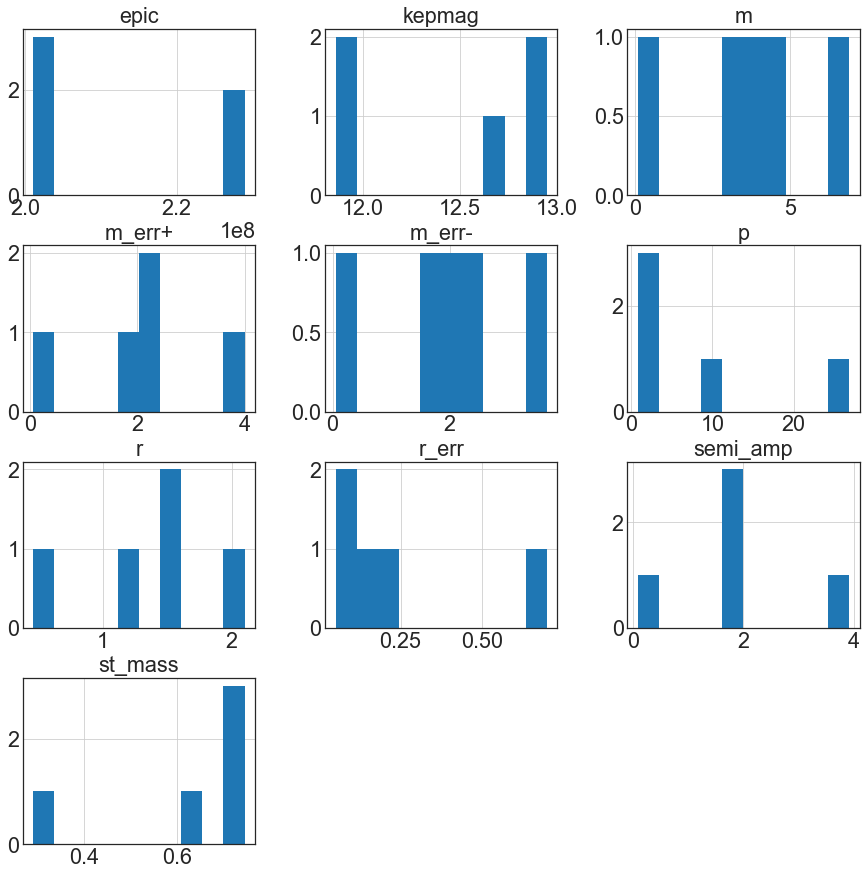

In [39]:
sub_neptune_around_bright_RedDwarf.hist(figsize=(15,15));

## Good for RV follow-up
* large semi-amplitude
* Red dwarfs around bright stars 

(0, 10)

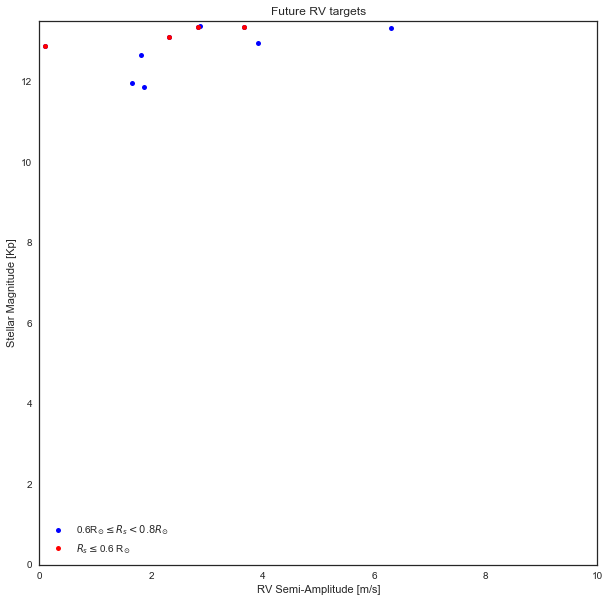

In [51]:
fig = pl.figure(figsize=(10,10))

loglog = False

m    = around_RedDwarf['m'].values
r    = around_RedDwarf['r'].values
minus= around_RedDwarf['m_err-'].values
plus = around_RedDwarf['m_err+'].values
rerr = around_RedDwarf['r_err'].values
m_err = [minus,plus]


mag  = around_RedDwarf['kepmag'].values
k    = around_RedDwarf['semi_amp'].values

names= around_RedDwarf['epic'].values

pl.plot(k,mag,'b.',ms=10,label='0.6R$_{\odot}\leq R_s<0.8R_{\odot}$')

around_MDwarf = df_final.query('st_mass < 0.6')
mmag = around_MDwarf['kepmag'].values
kk   = around_MDwarf['semi_amp'].values
#show those around M dwarf in red
pl.plot(kk,mmag,'r.',ms=10,label='$R_s\leq$0.6 R$_{\odot}$')


#pl.plot(k,mag,color='k')
if loglog:
    pl.xscale('log')
    pl.yscale('log')
pl.xlabel('RV Semi-Amplitude [m/s]')
pl.ylabel('Stellar Magnitude [Kp]')
pl.title('Future RV targets')
pl.legend(loc='best')


pl.ylim(0,13.5)
pl.xlim(0,10)

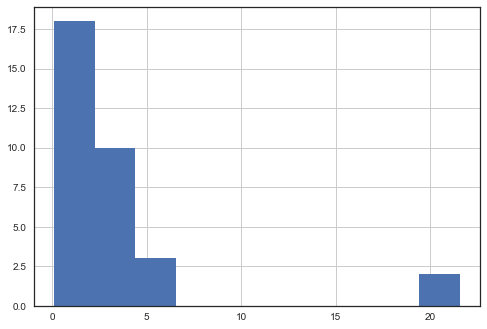

In [50]:
df_final.query('kepmag < 13')['semi_amp'].hist()

## MR relation and Correlation on Period and Stellar properties 

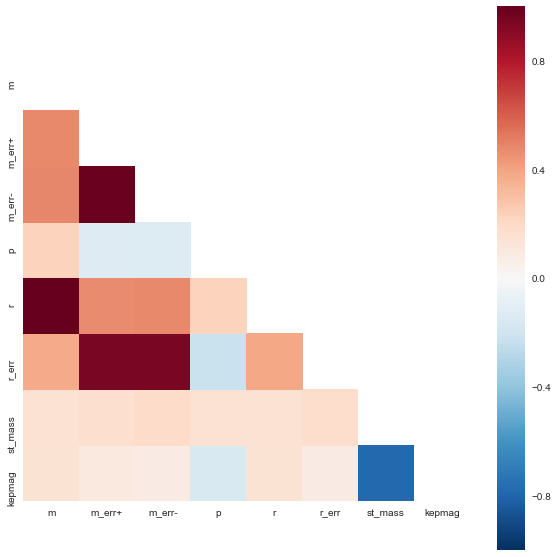

In [42]:
import seaborn as sb
sb.set_style('white')

fig = pl.figure(figsize=(10,10))

cols = within_gap.drop(['epic','pl'],axis=1).columns

corr = within_gap[cols].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sb.heatmap(corr, mask=mask, square=True)
         
# pl.imshow(corr)
# pl.yticks(range(len(cols)),cols);
# pl.xticks(range(len(cols)),cols, rotation=45);

Wolgang+2015 hinted

```
... probable dependencies of M-R relation  on period and stellar properties
```

but matrix shows poor-moderate correlation on period/ stellar mass.

## Regression

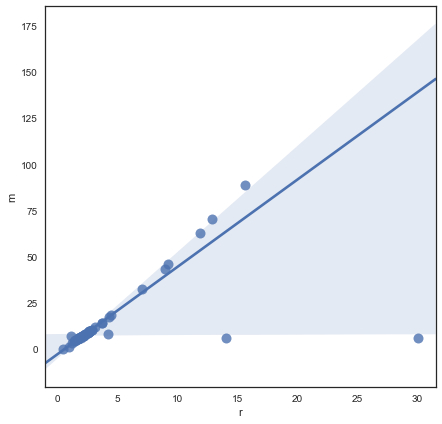

In [43]:
fig, ax = pl.subplots(figsize=(7, 7))

sb.regplot("r", "m", data=df_final, robust=True, ax=ax, scatter_kws={"s": 100})

## Regression (r<13R$_{\oplus}$)

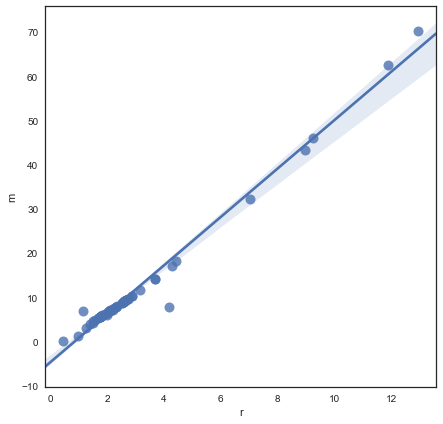

In [44]:
fig, ax = pl.subplots(figsize=(7, 7))

df_masked = df_final.query('r < 13')
rp = sb.regplot("r", "m", data=df_masked, ax=ax, scatter_kws={"s": 100})

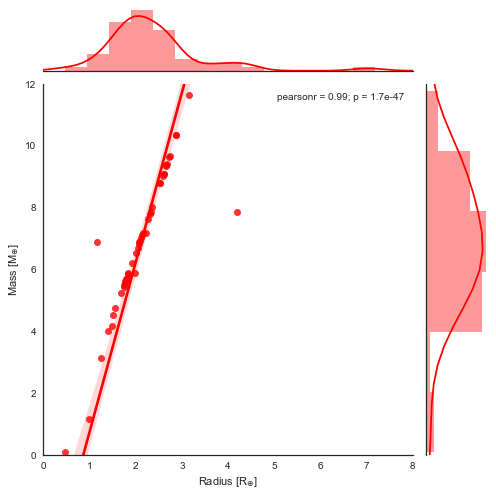

In [45]:
df_masked = df_final.query('r < 13')

g = sb.jointplot("r", "m", data=df_masked, kind="reg", size=7,
                 xlim=(0, 8), ylim=(0, 12), color="r")
g.set_axis_labels("Radius [R$_{\oplus}$]", "Mass [M$_{\oplus}$]")

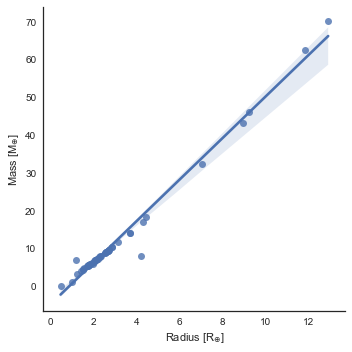

In [46]:
import seaborn as sb
sb.set_style('white')

df_masked = df_final.query('r < 13')

#add: hue='semi_amp',
g = sb.lmplot(x="r", y="m", 
               truncate=True, size=5, data=df_masked)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Radius [R$_{\oplus}$]", "Mass [M$_{\oplus}$]")
#g.set(xscale="log", yscale="log",xlim=[0.1,30])

## Fitting a power law
* See [scipy](http://scipy-cookbook.readthedocs.io/items/FittingData.html)

* van Eylen: R = P^−0.09 [+0.02 −0.04]

## Save df

In [47]:
df_final.to_csv('../data/final_results.csv')